Import necssary libraries and modules

In [31]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score

Import training, validation and testing datasets

In [32]:
# Load the train dataset
train_data = pd.read_csv('/kaggle/input/layer11/train.csv')
# Load the valid dataset
valid_data = pd.read_csv('/kaggle/input/layer11/valid.csv')
# Load the valid dataset
test_data = pd.read_csv('/kaggle/input/layer11/test.csv')

Visualize original training data

In [33]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.031138,0.079892,0.157382,-0.014636,-0.051778,-0.021332,-0.073593,-0.005386,-0.212557,0.099683,...,-0.085248,-0.096007,-0.000766,0.021399,-0.041432,0.094806,45,NaN,1,6
1,0.113040,0.175731,0.217741,-0.196254,-0.010129,-0.030586,0.067114,-0.072412,-0.239192,0.104741,...,-0.090283,-0.053885,-0.010967,0.062209,-0.122958,0.192949,45,NaN,1,6
2,0.048570,0.091281,0.160776,-0.150937,0.020115,0.044117,-0.050092,-0.045661,-0.155332,0.117206,...,-0.021524,-0.008411,-0.006248,0.031468,-0.056915,0.154731,45,NaN,1,6
3,0.039212,0.118388,0.173831,-0.096659,-0.008702,0.061298,0.008974,-0.003277,-0.065046,0.095480,...,-0.071936,-0.023120,-0.007812,0.057600,-0.121892,0.072796,45,NaN,1,6
4,0.056019,0.170639,0.157917,-0.228605,-0.065965,-0.088732,-0.082243,-0.080568,-0.341500,0.142430,...,-0.155621,-0.079447,0.015316,0.127726,-0.151966,0.169634,45,NaN,1,6


Process the data to remove null values for labels and estimate missing values in features

Drop the columns where there are null values for the lables in the training dataset

In [34]:
# Check for null values in train dataset
train_null_counts = train_data.isnull().sum()
print("train null counts : \n {}".format(train_null_counts))

# Drop rows with null values in the final four columns (target labels) for train dataset
train_data = train_data.dropna(subset=train_data.columns[-4:], how='any')
# Assuming 'train_data' is your DataFrame 28.330163
#train_data[train_data.columns[-4:]] = train_data[train_data.columns[-4:]].fillna(28)

train null counts : 
 feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64


Fill the null values in the features with their means in the train, valid and test datasets.

In [35]:
# Check for null values in train dataset
train_null_counts = valid_data.isnull().sum()
print("train null counts : \n {}".format(train_null_counts))

# Drop rows with null values in the final four columns (target labels) for train dataset
valid_data = valid_data.dropna(subset=valid_data.columns[-4:], how='any')

train null counts : 
 feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_768     0
label_1         0
label_2        14
label_3         0
label_4         0
Length: 772, dtype: int64


In [36]:
# Fill null values with mean in train dataset
train_data = train_data.fillna(train_data.mean().round())

# Fill null values with mean in valid dataset
valid_data = valid_data.fillna(valid_data.mean().round())

# Fill null values with mean in test dataset
test_data = test_data.fillna(test_data.mean())

# Concatenate train and valid datasets vertically
#train_data = pd.concat([train_data, valid_data], axis=0, ignore_index=True)

In [37]:
test_data.shape

(744, 769)

In [38]:
columns_to_remove = ['ID']
# Create a new DataFrame to hold the dropped column
saved_id_column = test_data[columns_to_remove].copy()

test_data = test_data.drop(columns=columns_to_remove)

Visualize processed training data

In [39]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
480,0.011657,0.038439,0.103671,-0.016977,-0.000953,-0.003522,-0.065092,-0.028373,-0.079483,0.038152,...,0.010156,0.002009,0.019304,0.015793,-0.012956,0.038805,5,25.0,1,6
481,0.164148,0.091572,0.228022,-0.096475,-0.041760,0.011285,-0.053629,-0.052081,-0.203983,0.119327,...,-0.105542,-0.097742,0.003595,0.043899,0.016852,0.190699,5,25.0,1,6
482,0.038285,0.055738,0.124604,-0.041057,-0.022140,0.014445,-0.050445,-0.038413,-0.069275,0.048514,...,-0.008590,-0.020720,-0.016982,0.014780,-0.020130,0.045188,5,25.0,1,6
483,0.179149,0.076565,0.324054,-0.159201,-0.071644,-0.071874,-0.043605,-0.079920,-0.287324,0.054799,...,-0.124709,-0.052751,-0.006879,0.160734,0.011273,0.142608,5,25.0,1,6
484,0.041122,0.054127,0.110883,-0.023344,-0.008510,0.003221,-0.023545,-0.001871,-0.077041,0.030782,...,-0.004103,0.000851,-0.019949,0.005263,-0.002535,0.052611,5,25.0,1,6


Separate features and labels in the train, valid and test datasets

In [40]:
# Separate features and labels in train dataset
train_features = train_data.iloc[:, :-4]
train_labels = train_data.iloc[:, -4:]

# Separate features and labels in valid dataset
valid_features = valid_data.iloc[:, :-4]
valid_labels = valid_data.iloc[:, -4:]

# Separate features and labels in test dataset
test_features = test_data


Extract the first label in the train, valid and test datasets

In [41]:
# get the first label of the train dataset
train_label1 = train_labels.iloc[:,1]

# get the first label of the valid dataset
valid_label1 = valid_labels.iloc[:,1]



In [42]:
valid_label1

14     25.0
15     25.0
16     25.0
17     25.0
18     25.0
       ... 
745    29.0
746    29.0
747    29.0
748    29.0
749    29.0
Name: label_2, Length: 736, dtype: float64

# Predicting Label 1 without Feature Engineering

Predict label 1 without feature engineering steps and techniques

Make copies of the features and labels of the datasets to be used in the models without feature engineering

In [43]:
# Make a copy features and labels in train dataset
train_features_copy = train_features.copy()
train_labels_copy = train_labels.copy()

# Make a copy features and labels in valid dataset
valid_features_copy = valid_features.copy()
valid_labels_copy = valid_labels.copy()

# Make a copy features and labels in test dataset
test_features_copy = test_features.copy()
test_features_copy

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.124623,0.196628,0.257004,-0.156045,-0.054916,0.006071,-0.035149,-0.092019,-0.196302,0.077971,...,-0.221466,0.140292,0.123622,-0.175572,-0.107030,-0.087621,-0.026501,0.139337,-0.083030,0.059507
1,0.109655,0.170158,0.227644,-0.127088,-0.044476,-0.046852,-0.090026,-0.061321,-0.227288,0.066863,...,-0.204930,0.110203,0.085665,-0.286787,-0.113195,-0.057312,-0.055680,0.143939,-0.045760,0.106113
2,0.014854,0.030051,0.115092,-0.017179,0.002720,-0.011692,-0.078855,-0.042991,-0.096283,0.042701,...,-0.032937,0.075821,0.030987,-0.149850,-0.003155,-0.010207,-0.001427,0.000934,-0.017069,0.048123
3,0.196893,0.113314,0.352175,-0.108499,-0.064472,-0.073239,-0.086402,0.008671,-0.342217,0.104941,...,-0.255167,0.096579,0.069413,-0.215386,-0.075168,-0.035071,-0.023375,0.067768,-0.181530,0.174444
4,0.033004,0.013373,0.124001,-0.016143,0.010120,0.010635,-0.055789,-0.036282,-0.059422,0.060278,...,-0.035814,0.093764,0.027321,-0.116009,0.010096,-0.042293,0.005347,0.007722,-0.007731,0.058799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,-0.028521,0.017629,0.116956,-0.092957,0.027548,0.071823,-0.078945,-0.017882,-0.063286,0.074607,...,-0.101669,0.119924,0.014189,-0.114864,0.030527,-0.036430,0.004364,0.011239,-0.005128,0.141674
740,0.006921,0.031997,0.101940,-0.046349,-0.001958,-0.003312,-0.055653,-0.006035,-0.055854,0.015251,...,0.001517,0.040581,0.020779,-0.054269,0.035295,-0.016866,-0.013290,-0.000578,0.020720,0.037498
741,0.067027,0.029341,0.099419,0.008187,0.012125,0.006544,-0.050957,-0.081037,-0.046458,0.058555,...,-0.048202,0.059836,0.031391,-0.129698,0.011240,-0.039363,-0.005562,0.073112,-0.023642,0.095898
742,0.049263,0.029409,0.094083,-0.052625,0.001279,0.000133,-0.042313,-0.020200,-0.058053,0.035704,...,-0.015722,0.080432,0.029869,-0.075587,0.017989,-0.020131,-0.016471,0.024185,0.024485,0.065564


In [44]:
test_features_copy.shape

(744, 768)

Make copies of the label 1 of the datasets to be used in the models without feature engineering

In [45]:
# Make a copy of the first label of the train dataset
train_label1_copy = train_label1.copy()

# Make a copy of the first label of the valid dataset
valid_label1_copy = valid_label1.copy()



Standardize the features of all datasets

In [46]:
test_features_copy.shape

(744, 768)

Use the raw scaled features to train the best model which is SVM

Used the trained model on all features to predict the valid and test data and get metrics

# Predicting Label 1 with Feature Engineering

Predict label 1 with feature engineering steps and techniques

## Feature Engineering

Use feature selection based on correlation matrix and feature extraction based on PCA

### Feature Selection

Visualize the distribution of the training label 1

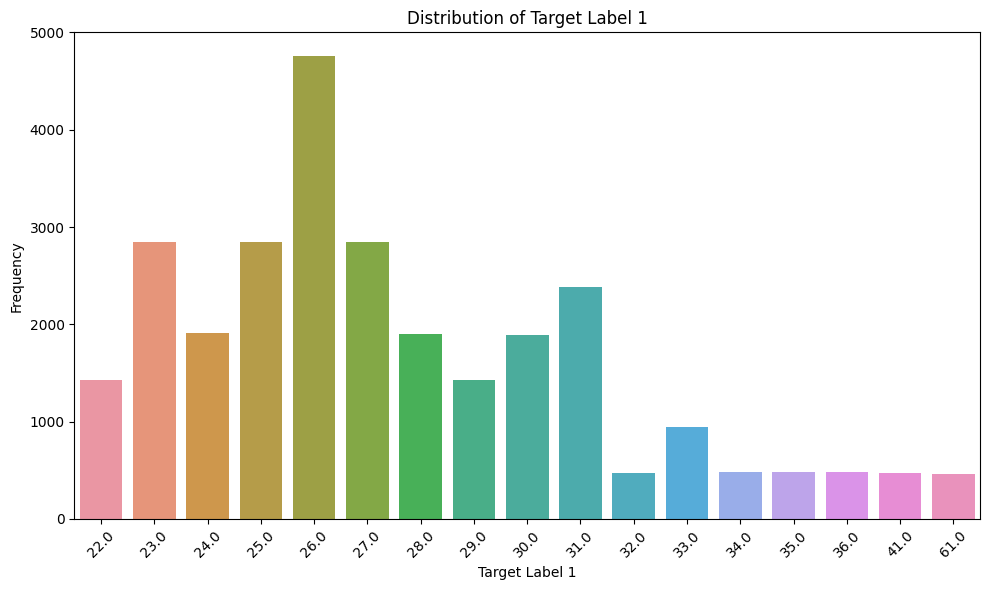

In [47]:
# Plotting the distribution of train_label1
labels, counts = np.unique(train_label1, return_counts=True)

# Create a more readable distribution plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x=train_label1)
plt.xlabel('Target Label 1')
plt.ylabel('Frequency')
plt.title('Distribution of Target Label 1')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Calculate the correlation matrix of the training data features

In [48]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Create an instance of the RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Create an instance of the RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Create a pipeline that first applies over-sampling and then under-sampling
sampling_pipeline = Pipeline([
    ('over_sampling', over_sampler),
    ('under_sampling', under_sampler)
])



# Apply the sampling pipeline
#train_features, train_label1 = sampling_pipeline.fit_resample(train_features, train_label1)


In [49]:
#Calculate the correlation matrix
correlation_matrix = train_features.corr()

mask = np.triu(np.ones_like(correlation_matrix))



Identify the features that are highly correlated with each other using the traning dataset

In [50]:
# Set the threshold for correlation
correlation_threshold = 0.99

highly_correlated = set()

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

print(highly_correlated)

set()


Remove the previously identified highly correlated features from all the datasets

In [51]:
# Remove highly correlated features
train_features = train_features.drop(columns=highly_correlated)
valid_features = valid_features.drop(columns=highly_correlated)
test_features = test_features.drop(columns=highly_correlated)

Display the resulting feature shapes of the datasets

In [52]:
# Display the filtered train feature count
print("Filtered train features: {}".format(train_features.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(valid_features.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(test_features.shape))

Filtered train features: (28040, 768)
Filtered valid features: (736, 768)
Filtered test features: (744, 768)


Identify the features that are highly correlated with the label using the traning dataset

In [53]:
# Calculate the correlation matrix between features and train_label1
correlation_with_target = train_features.corrwith(train_label1)

# Set the correlation threshold
correlation_threshold = 0.001

# Select features that meet the correlation threshold
highly_correlated_features = correlation_with_target[correlation_with_target.abs() > correlation_threshold]

print(highly_correlated_features)

feature_1     -0.006045
feature_2     -0.004030
feature_3     -0.008561
feature_4     -0.010837
feature_5     -0.009999
                 ...   
feature_764   -0.038517
feature_765    0.066395
feature_766   -0.008880
feature_767    0.014535
feature_768    0.037070
Length: 753, dtype: float64


Extract the features that are only highly correlated with the label from all datasets

In [54]:
# Drop the features with low correlated in train data
train_features = train_features[highly_correlated_features.index]

# Drop the features with low correlated in valid data
valid_features = valid_features[highly_correlated_features.index]

# Drop the features with low correlated in test data
test_features = test_features[highly_correlated_features.index]

Display the resulting feature shapes of the datasets

In [55]:
# Display the filtered train feature count
print("Filtered train features: {}".format(train_features.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(valid_features.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(test_features.shape))

Filtered train features: (28040, 753)
Filtered valid features: (736, 753)
Filtered test features: (744, 753)


Standardize the features of all datasets

In [56]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()
#scaler = StandardScaler()
standardized_train_features = scaler.fit_transform(train_features)
standardized_valid_features = scaler.transform(valid_features)
standardized_test_features = scaler.transform(test_features)

### Feature Extraction

Extract can combine the features that are highly significant in predicting the label using Principal Componenet Analysis(PCA)

Extract the features that can explain the variance of the label to 99%

Display the resulting explained variances of each principal component

Explained Variance Ratio after Dimensionality Reduction: [4.06079718e-01 9.58286597e-02 4.72913801e-02 3.46880039e-02
 2.56793169e-02 2.51616751e-02 1.83593178e-02 1.58077824e-02
 1.47687972e-02 1.28386445e-02 1.12431733e-02 1.08193468e-02
 9.34134572e-03 8.68836582e-03 8.33135405e-03 7.63060644e-03
 7.04035690e-03 6.30522871e-03 5.96514626e-03 5.72622302e-03
 5.28276601e-03 4.94091947e-03 4.77600605e-03 4.63893549e-03
 4.36919479e-03 4.06001368e-03 3.84315683e-03 3.79408530e-03
 3.49837995e-03 3.40769635e-03 3.35066402e-03 3.32251299e-03
 3.12424220e-03 3.01006836e-03 2.86084758e-03 2.75503276e-03
 2.68621406e-03 2.50515153e-03 2.46849283e-03 2.42569846e-03
 2.36827030e-03 2.35437183e-03 2.27446527e-03 2.17657622e-03
 2.04867524e-03 2.04007065e-03 1.94323476e-03 1.93901069e-03
 1.89517708e-03 1.81731125e-03 1.75479858e-03 1.72553242e-03
 1.66877144e-03 1.63542371e-03 1.61296245e-03 1.56977884e-03
 1.52084280e-03 1.49589813e-03 1.44177323e-03 1.41777160e-03
 1.39919183e-03 1.37483684e-

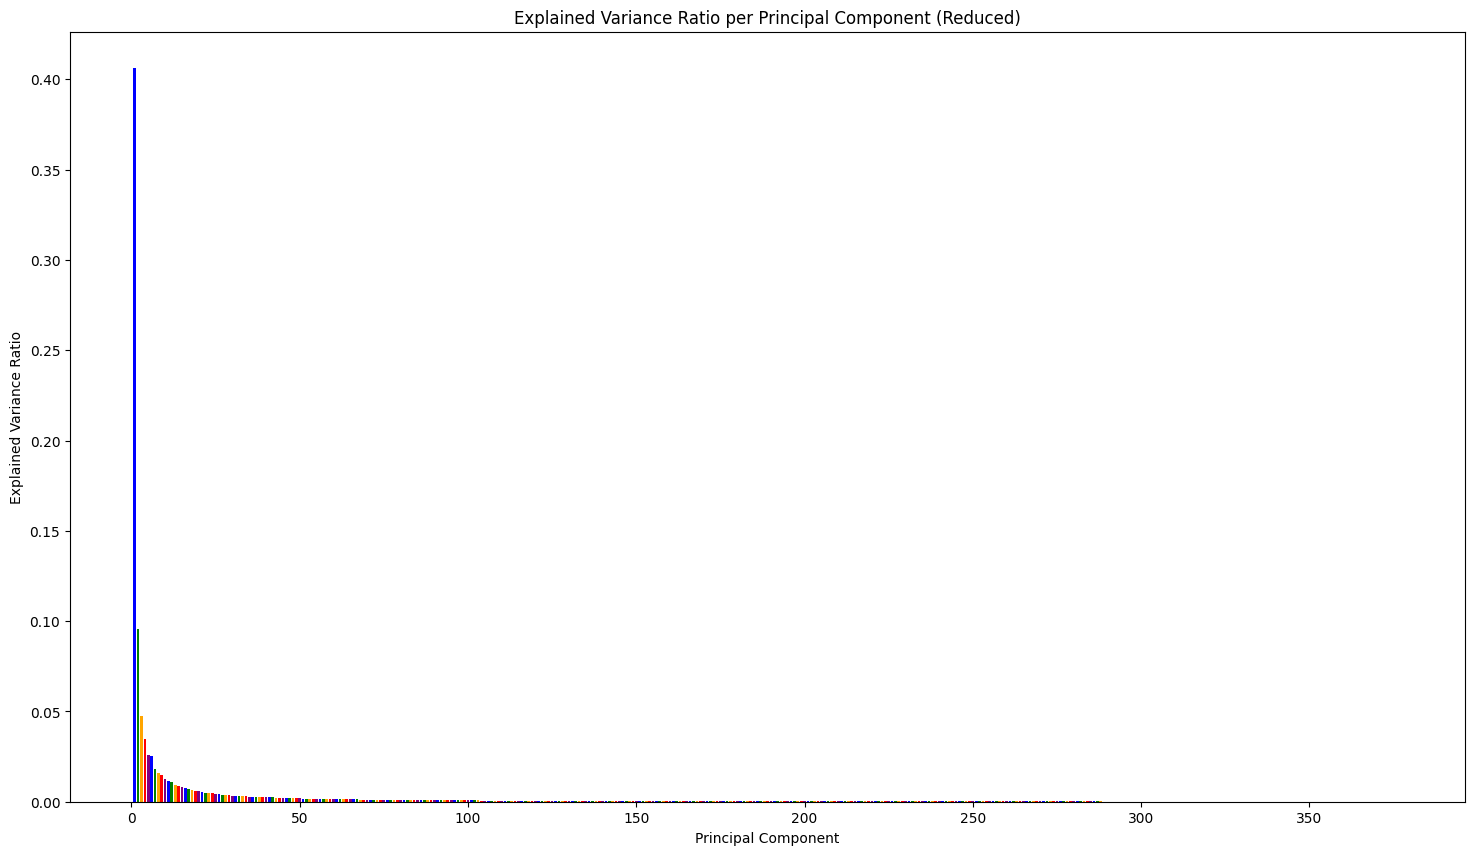

Reduced Train feature matrix shape: (28040, 377)
Reduced valid feature matrix shape: (736, 377)
Reduced test feature matrix shape: (744, 377)


In [57]:
variance_threshold = 0.99

# Apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_result = pca.fit_transform(standardized_train_features)
pca_valid_result = pca.transform(standardized_valid_features)
pca_test_result = pca.transform(standardized_test_features)

# Explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_
print("Explained Variance Ratio after Dimensionality Reduction:", explained_variance_ratio_reduced)
# Create a list of colors for each bar
colors = ['blue', 'green', 'orange', 'red', 'purple']
plt.figure(figsize=(18, 10))
# Create the colored bar chart
bars = plt.bar(range(1, len(explained_variance_ratio_reduced) + 1), explained_variance_ratio_reduced, color=colors)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Reduced)')
# Adding a legend for colors

plt.show()

# Display the reduced train feature matrix
print("Reduced Train feature matrix shape: {}".format(pca_train_result.shape))
# Display the reduced valid feature matrix
print("Reduced valid feature matrix shape: {}".format(pca_valid_result.shape))
# Display the reduced test feature matrix
print("Reduced test feature matrix shape: {}".format(pca_test_result.shape))

## Model Selection

Select the model that best predicts the valid and test datasets based on accuracy, precision and recall

In [58]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Best hyperparameters obtained from grid search
best_params = {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

# Define a list of classification models
classification_models = [
    
    ('SVM', SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])),
    #('K Neighbors', KNeighborsClassifier()),
    #('Decision Tree', DecisionTreeClassifier()),
    #('Random Forest', RandomForestClassifier()),
  
    #('XGBoost', XGBClassifier()),
    #('LightGBM', LGBMClassifier())  # Add LGBMClassifier here
]

# The best model is SVM then KNN then Random Forest then Decision Tree

# Number of features used in PCA
num_features = pca_train_result.shape[1]
print(f"Number of features: {num_features}\n")

# Train and evaluate each classification model
for model_name, model in classification_models:
    # Train the model on the training data
    model.fit(pca_train_result, train_label1)

    # Predict on the train data
    y_pred_train = model.predict(pca_train_result)

    # Calculate metrics for classification evaluation
    accuracy = accuracy_score(train_label1, y_pred_train)
    precision = precision_score(train_label1, y_pred_train, average='weighted' , zero_division=1)
    recall = recall_score(train_label1, y_pred_train, average='weighted')

    print(f"Metrics for {model_name} on train data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the validation data
    y_pred_valid = model.predict(pca_valid_result)
   
    # Calculate metrics for classification evaluation on validation data
    accuracy = accuracy_score(valid_label1, y_pred_valid)
    precision = precision_score(valid_label1, y_pred_valid, average='weighted', zero_division=1)
    recall = recall_score(valid_label1, y_pred_valid, average='weighted')

    print(f"Metrics for {model_name} on validation data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the test data
    y_pred_test = model.predict(pca_test_result)

    # Calculate metrics for classification evaluation on test data
    #accuracy = accuracy_score(test_label1, y_pred_test)
    #precision = precision_score(test_label1, y_pred_test, average='weighted', zero_division=1)
    #recall = recall_score(test_label1, y_pred_test, average='weighted')

    #print(f"Metrics for {model_name} on test data:")
    #print(f"Accuracy: {accuracy:.2f}")
    #print(f"Precision: {precision:.2f}")
    #print(f"Recall: {recall:.2f}")
    #print("\n")


Number of features: 377

Metrics for SVM on train data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


Metrics for SVM on validation data:
Accuracy: 0.91
Precision: 0.91
Recall: 0.91




Define method to create the csv file

In [59]:
# define method to create the dataframe and save it as a csv file
def create_csv(pred_after_fe):

  df = pd.DataFrame()

  df.insert(loc=0, column='ID', value=saved_id_column)
  df.insert(loc=1, column='Label 2', value=pred_after_fe)
 
  df.to_csv('/kaggle/working/190458T_11label_2.csv', index=False)

Create CSV file

In [60]:
# create the csv output file
create_csv(y_pred_test)